<a href="https://colab.research.google.com/github/iamThang/Fruits-Recognition-Use-CNN/blob/main/Fruits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.4.0


In [ ]:
!apt-get install python3.7 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7-minimal
Suggested packages:
  python3.7-venv python3.7-doc binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib python3.7 python3.7-minimal
0 upgraded, 4 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,282 kB of archives.
After this operation, 22.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libpython3.7-minimal amd64 3.7.5-2~18.04 [546 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3.7-minimal amd64 3.7.5-2~18.04 [1,691 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 libpython3.7-stdlib amd64 3.7.5-2~18.04 [1,745 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3.7 amd6

In [ ]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 394.7MB 41kB/s 
     |████████████████████████████████| 3.8MB 51.9MB/s 
     |████████████████████████████████| 471kB 49.4MB/s 
     |████████████████████████████████| 14.5MB 251kB/s 
     |████████████████████████████████| 10.6MB 44.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: grpcio 1.34.0
    Uninstalling grpcio-1.34.0:
      Successfully uninstalled grpcio-1.34.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
    

In [ ]:
pip install h5py

In [ ]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/My Drive/Image/Dataset/FruitsImage/thang"

In [ ]:

#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image


In [ ]:
#Checking the directory
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_77.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_77.xml
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_79.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_91.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_89.xml
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/banana_81.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_87.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/banana_82.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_92.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_94.xml
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_82.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_92.xml
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_80.xml
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_80.jpg
gdrive/My Drive/Image/Dataset/FruitsImage/thang/test/apple_90.jpg
gdrive/M

In [ ]:
images  =  []       
labels  =  [] 
train_path  =  'gdrive/My Drive/Image/Dataset/FruitsImage/thang/train_zip/train'
for filename in os.listdir('gdrive/My Drive/Image/Dataset/FruitsImage/thang/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [ ]:
#Image Labels
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_encod  =  LabelEncoder()
labels = pd.DataFrame(labels)
labels = lb_encod.fit_transform(labels[0])
labels

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3])

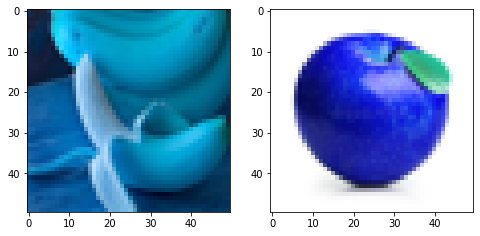

In [ ]:
#Visualizing image, hinh dung anh, ve anh
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[14]) # 
bx = figure.add_subplot(122)
bx.imshow(images[20]) # 
plt.show()

In [ ]:
#In the next step, we will preprocess the image data

#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [ ]:
num_classes = len(np.unique(labels))
len_data = len(image)

x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
from keras.models import Sequential, Input, Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))


cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

In [ ]:
#Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

#Training the CNN Model
filepath = 'weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 110,verbose = 1,validation_split = 0.33)


Epoch 1/110
2/2 [==============================] - 8s 540ms/step - loss: 14.1385 - accuracy: 0.3336 - val_loss: 1.5507 - val_accuracy: 0.2639
Epoch 2/110
2/2 [==============================] - 0s 138ms/step - loss: 1.9432 - accuracy: 0.2216 - val_loss: 1.5187 - val_accuracy: 0.0972
Epoch 3/110
2/2 [==============================] - 0s 35ms/step - loss: 1.5176 - accuracy: 0.1276 - val_loss: 1.5179 - val_accuracy: 0.2500
Epoch 4/110
2/2 [==============================] - 0s 34ms/step - loss: 1.5178 - accuracy: 0.2954 - val_loss: 1.5169 - val_accuracy: 0.3472
Epoch 5/110
2/2 [==============================] - 0s 34ms/step - loss: 1.5161 - accuracy: 0.3151 - val_loss: 1.5158 - val_accuracy: 0.3472
Epoch 6/110
2/2 [==============================] - 0s 35ms/step - loss: 1.5154 - accuracy: 0.3177 - val_loss: 1.5148 - val_accuracy: 0.3472
Epoch 7/110
2/2 [==============================] - 0s 35ms/step - loss: 1.5134 - accuracy: 0.3177 - val_loss: 1.5137 - val_accuracy: 0.2500
Epoch 8/110
2/2 [

    # val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

    # val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

    # val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)


In [ ]:
#kiem tra hieu suat
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 16ms/step - loss: 1.4254 - accuracy: 0.4583
Test loss: 1.4254294633865356
Test accuracy: 0.4583333432674408


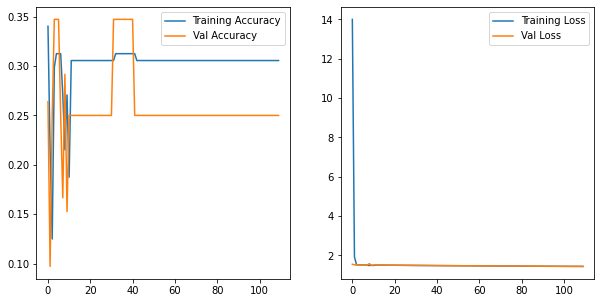

In [ ]:
#Visualize the performance
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

banana


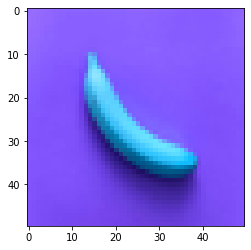

In [ ]:
#Test
test_path  =  'gdrive/My Drive/Image/Dataset/FruitsImage/thang/test'
t_labels = []
t_images = []
for filename in os.listdir('gdrive/My Drive/Image/Dataset/FruitsImage/thang/test'):
    if filename.split('.')[1]=='jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

test_images = np.array(t_images)
np.save("test_image",test_images)
test_image = np.load("image.npy",allow_pickle = True)

pred = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction =  lb_encod.inverse_transform(pred)

test_image = np.expand_dims(test_image[90],axis = 0)
pred_test = np.argmax(cnn_model.predict(test_image),axis = 1)
prediction_test  =  lb_encod.inverse_transform(pred_test)

print(prediction_test[0])
plt.imshow(test_images[30])

# /content/drive/MyDrive/Image/Dataset/FruitsImage/thang/test